In [1]:
import pandas as pd
elec_consumption = pd.read_csv('C:/Users/Ossama/Python/Sub-national_electricity_consumption_statistics_2005-16.csv',encoding = "ISO-8859-1")

In [2]:
elec_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 27 columns):
 Sub-national electricity sales and numbers of customers, 2016 (1)     382 non-null object
Unnamed: 1                                                             398 non-null object
Unnamed: 2                                                             396 non-null object
Unnamed: 3                                                             391 non-null object
 Number of MPANs (thousands)                                           397 non-null object
Unnamed: 5                                                             396 non-null object
Unnamed: 6                                                             396 non-null object
Unnamed: 7                                                             397 non-null object
Unnamed: 8                                                             396 non-null object
 Sales (GWh)                                                           397 n

In [3]:
elec_consumption.head()

,"Sub-national electricity sales and numbers of customers, 2016 (1)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Number of MPANs (thousands),Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Sales (GWh),...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Average domestic consumption per household (kWh) (2),Unnamed: 26
0,NaN,NaN,NaN,NaN,Domestic consumers,NaN,NaN,Non-domestic consumers,NaN,Domestic consumers,...,NaN,All domestic,NaN,Non-domestic,NaN,All,NaN,NaN,NaN,NaN
1,Region,Local Authority,LA Code,LAU1,Economy 7 meters,Standard Meters,All domestic,All Non-domestic,Total number of Meters,Economy 7 meters,...,Median consumption,Mean consumption,Median consumption,Mean consumption,Median consumption,Mean consumption,Median consumption,NaN,NaN,NaN
2,NORTH EAST,County Durham,E06000047,UKC1400,9,233,242,16,258,48,...,"2,707","3,222","2,728","68,230","7,511","7,248","2,784",NaN,"3,389",NaN
3,NORTH EAST,Darlington,E06000005,UKC1300,4,47,50,4,54,17,...,"2,796","3,372","2,824","63,767","7,656","7,493","2,885",NaN,"3,578",NaN
4,NORTH EAST,Hartlepool,E06000001,UKC1101,2,41,43,3,46,9,...,"2,724","3,178","2,736","95,987","5,542","9,254","2,777",NaN,"3,286",NaN


In [4]:
elec_consumption.drop(elec_consumption.columns[[24,26]],axis=1,inplace=True)
no_meters = ['Domestic consumers - Economy 7 meters', 'Domestic consumers - Standard Meters', \
             'Domestic consumers - Total','Non-domestic consumers','Total number of Meters']
sales = ['Consumption (GWh) of ' + consumers for consumers in no_meters]
sales[4] = 'Total consumption (GWh) of all consumers'
sales

['Consumption (GWh) of Domestic consumers - Economy 7 meters',
 'Consumption (GWh) of Domestic consumers - Standard Meters',
 'Consumption (GWh) of Domestic consumers - Total',
 'Consumption (GWh) of Non-domestic consumers',
 'Total consumption (GWh) of all consumers']

In [5]:
domestic_type = ['Domestic Economy 7','Standard','All Domestic','Non-domestic']
averages_KWh = []
for kind_consumer in domestic_type:
    averages_KWh.append('Average (kWh) ' + kind_consumer + ' Mean consumption')
    averages_KWh.append('Average (kWh) ' + kind_consumer + ' Median consumption')
averages_KWh.append('Average (kWh) All Mean consumption')
averages_KWh.append('Average (kWh) All Median consumption')

In [6]:
import itertools
new_list = list(itertools.chain(elec_consumption.iloc[1,:4].values, no_meters,\
                                sales,averages_KWh,['Average domestic consumption per household (kWh)']))
new_list[0] = new_list[0].strip()
new_list[1] = new_list[1].strip()
new_list[2] = new_list[2].strip()
new_list[3] = new_list[3].strip()
new_list[24] = new_list[24].strip()

In [7]:
elec_consumption.columns = new_list
elec_consumption.head()

,Region,Local Authority,LA Code,LAU1,Domestic consumers - Economy 7 meters,Domestic consumers - Standard Meters,Domestic consumers - Total,Non-domestic consumers,Total number of Meters,Consumption (GWh) of Domestic consumers - Economy 7 meters,...,Average (kWh) Domestic Economy 7 Median consumption,Average (kWh) Standard Mean consumption,Average (kWh) Standard Median consumption,Average (kWh) All Domestic Mean consumption,Average (kWh) All Domestic Median consumption,Average (kWh) Non-domestic Mean consumption,Average (kWh) Non-domestic Median consumption,Average (kWh) All Mean consumption,Average (kWh) All Median consumption,Average domestic consumption per household (kWh)
0,NaN,NaN,NaN,NaN,Domestic consumers,NaN,NaN,Non-domestic consumers,NaN,Domestic consumers,...,NaN,Standard,NaN,All domestic,NaN,Non-domestic,NaN,All,NaN,NaN
1,Region,Local Authority,LA Code,LAU1,Economy 7 meters,Standard Meters,All domestic,All Non-domestic,Total number of Meters,Economy 7 meters,...,Median consumption,Mean consumption,Median consumption,Mean consumption,Median consumption,Mean consumption,Median consumption,Mean consumption,Median consumption,NaN
2,NORTH EAST,County Durham,E06000047,UKC1400,9,233,242,16,258,48,...,"4,029","3,136","2,707","3,222","2,728","68,230","7,511","7,248","2,784","3,389"
3,NORTH EAST,Darlington,E06000005,UKC1300,4,47,50,4,54,17,...,"3,642","3,255","2,796","3,372","2,824","63,767","7,656","7,493","2,885","3,578"
4,NORTH EAST,Hartlepool,E06000001,UKC1101,2,41,43,3,46,9,...,"3,165","3,121","2,724","3,178","2,736","95,987","5,542","9,254","2,777","3,286"


In [8]:
elec_consumption.drop([0,1],inplace=True)
elec_consumption.index = range(elec_consumption.shape[0])
elec_consumption.head()

,Region,Local Authority,LA Code,LAU1,Domestic consumers - Economy 7 meters,Domestic consumers - Standard Meters,Domestic consumers - Total,Non-domestic consumers,Total number of Meters,Consumption (GWh) of Domestic consumers - Economy 7 meters,...,Average (kWh) Domestic Economy 7 Median consumption,Average (kWh) Standard Mean consumption,Average (kWh) Standard Median consumption,Average (kWh) All Domestic Mean consumption,Average (kWh) All Domestic Median consumption,Average (kWh) Non-domestic Mean consumption,Average (kWh) Non-domestic Median consumption,Average (kWh) All Mean consumption,Average (kWh) All Median consumption,Average domestic consumption per household (kWh)
0,NORTH EAST,County Durham,E06000047,UKC1400,9,233,242,16,258,48,...,"4,029","3,136","2,707","3,222","2,728","68,230","7,511","7,248","2,784","3,389"
1,NORTH EAST,Darlington,E06000005,UKC1300,4,47,50,4,54,17,...,"3,642","3,255","2,796","3,372","2,824","63,767","7,656","7,493","2,885","3,578"
2,NORTH EAST,Hartlepool,E06000001,UKC1101,2,41,43,3,46,9,...,"3,165","3,121","2,724","3,178","2,736","95,987","5,542","9,254","2,777","3,286"
3,NORTH EAST,Middlesbrough,E06000002,UKC1201,4,59,62,4,66,15,...,"3,009","3,119","2,736","3,172","2,748","64,549","8,643","7,080","2,811","3,389"
4,NORTH EAST,Northumberland,E06000057,UKC2100,13,141,154,14,168,77,...,"4,228","3,433","2,864","3,637","2,918","63,128","7,186","8,513","3,000","3,957"


In [9]:
elec_consumption.tail()

,Region,Local Authority,LA Code,LAU1,Domestic consumers - Economy 7 meters,Domestic consumers - Standard Meters,Domestic consumers - Total,Non-domestic consumers,Total number of Meters,Consumption (GWh) of Domestic consumers - Economy 7 meters,...,Average (kWh) Domestic Economy 7 Median consumption,Average (kWh) Standard Mean consumption,Average (kWh) Standard Median consumption,Average (kWh) All Domestic Mean consumption,Average (kWh) All Domestic Median consumption,Average (kWh) Non-domestic Mean consumption,Average (kWh) Non-domestic Median consumption,Average (kWh) All Mean consumption,Average (kWh) All Median consumption,Average domestic consumption per household (kWh)
395,NaN,Scotland,S92000003,UKM,433,"2,348","2,781",220,"3,001","2,164",...,"3,819","3,383","2,848","3,635","2,923","61,337","8,597","7,861","3,003","4,122"
396,NaN,Unallocated,Unallocated,NaN,5,65,70,33,104,26,...,"4,516","3,212","2,523","3,354","2,597","181,021","8,055","60,353","2,904",NaN
397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,NaN,(1) There has been changes made to the method ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399,NaN,(2) Household figures based on various sources...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
elec_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
Region                                                        381 non-null object
Local Authority                                               397 non-null object
LA Code                                                       395 non-null object
LAU1                                                          390 non-null object
Domestic consumers - Economy 7 meters                         395 non-null object
Domestic consumers - Standard Meters                          395 non-null object
Domestic consumers - Total                                    395 non-null object
Non-domestic consumers                                        395 non-null object
Total number of Meters                                        395 non-null object
Consumption (GWh) of Domestic consumers - Economy 7 meters    395 non-null object
Consumption (GWh) of Domestic consumers - Standard Meters     395 non-null 

In [11]:
elec_consumption.shape

(400, 25)

In [12]:
elec_consumption.drop(elec_consumption.tail(3).index,inplace=True)

In [13]:
elec_consumption.tail(20)

,Region,Local Authority,LA Code,LAU1,Domestic consumers - Economy 7 meters,Domestic consumers - Standard Meters,Domestic consumers - Total,Non-domestic consumers,Total number of Meters,Consumption (GWh) of Domestic consumers - Economy 7 meters,...,Average (kWh) Domestic Economy 7 Median consumption,Average (kWh) Standard Mean consumption,Average (kWh) Standard Median consumption,Average (kWh) All Domestic Mean consumption,Average (kWh) All Domestic Median consumption,Average (kWh) Non-domestic Mean consumption,Average (kWh) Non-domestic Median consumption,Average (kWh) All Mean consumption,Average (kWh) All Median consumption,Average domestic consumption per household (kWh)
377,SCOTLAND,Stirling,S12000030,UKM2702,7,38,44,4,49,41,...,"4,779","3,746","3,050","4,110","3,167","62,597","9,365","9,462","3,288","4,662"
378,SCOTLAND,West Dunbartonshire,S12000039,UKM3102,6,42,47,3,50,19,...,"2,395","3,027","2,669","3,064","2,650","61,199","8,575","6,482","2,700","3,400"
379,SCOTLAND,West Lothian,S12000040,UKM2800,6,74,80,5,85,26,...,"3,552","3,477","3,044","3,558","3,064","96,937","10,691","9,437","3,131","3,707"
380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
381,"(TOTAL, ALL)",Great Britain,K03000001,NaN,"4,371","23,723","28,094","2,495","30,589","22,746",...,"3,995","3,519","2,915","3,781","3,028","68,460","8,046","9,056","3,107","3,931"
382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
383,NaN,England,E92000001,NaN,"3,834","19,999","23,833","2,113","25,946","19,931",...,"3,991","3,546","2,927","3,812","3,047","66,981","8,038","8,957","3,125","3,911"
384,NaN,North East,E12000001,UKC,69,"1,151","1,220",84,"1,304",344,...,"3,816","3,142","2,713","3,247","2,741","84,737","7,787","8,494","2,801","4,005"
385,NaN,North West,E12000002,UKD,234,"2,974","3,208",246,"3,454","1,343",...,"4,607","3,436","2,941","3,604","3,005","76,400","9,072","8,791","3,083","3,557"
386,NaN,Yorkshire and The Humber,E12000003,UKE,173,"2,214","2,387",186,"2,573",935,...,"4,173","3,362","2,825","3,510","2,875","75,012","8,792","8,682","2,953","3,588"


In [14]:
elec_consumption.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 396
Data columns (total 25 columns):
Region                                                        381 non-null object
Local Authority                                               395 non-null object
LA Code                                                       395 non-null object
LAU1                                                          390 non-null object
Domestic consumers - Economy 7 meters                         395 non-null object
Domestic consumers - Standard Meters                          395 non-null object
Domestic consumers - Total                                    395 non-null object
Non-domestic consumers                                        395 non-null object
Total number of Meters                                        395 non-null object
Consumption (GWh) of Domestic consumers - Economy 7 meters    395 non-null object
Consumption (GWh) of Domestic consumers - Standard Meters     395 non-null 

In [15]:
elec_consumption.drop([380,382,396],inplace=True)
elec_consumption.index = range(elec_consumption.shape[0])

In [16]:
elec_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 25 columns):
Region                                                        381 non-null object
Local Authority                                               394 non-null object
LA Code                                                       394 non-null object
LAU1                                                          390 non-null object
Domestic consumers - Economy 7 meters                         394 non-null object
Domestic consumers - Standard Meters                          394 non-null object
Domestic consumers - Total                                    394 non-null object
Non-domestic consumers                                        394 non-null object
Total number of Meters                                        394 non-null object
Consumption (GWh) of Domestic consumers - Economy 7 meters    394 non-null object
Consumption (GWh) of Domestic consumers - Standard Meters     394 non-null 

In [17]:
elec_consumption.tail(20)

,Region,Local Authority,LA Code,LAU1,Domestic consumers - Economy 7 meters,Domestic consumers - Standard Meters,Domestic consumers - Total,Non-domestic consumers,Total number of Meters,Consumption (GWh) of Domestic consumers - Economy 7 meters,...,Average (kWh) Domestic Economy 7 Median consumption,Average (kWh) Standard Mean consumption,Average (kWh) Standard Median consumption,Average (kWh) All Domestic Mean consumption,Average (kWh) All Domestic Median consumption,Average (kWh) Non-domestic Mean consumption,Average (kWh) Non-domestic Median consumption,Average (kWh) All Mean consumption,Average (kWh) All Median consumption,Average domestic consumption per household (kWh)
374,SCOTLAND,Shetland Islands,S12000027,UKM6600,8,9,17,2,19,63,...,"6,700","4,111","3,248","5,715","4,597","47,214","7,829","9,768","4,689","9,706"
375,SCOTLAND,South Ayrshire,S12000028,UKM3700,7,51,58,5,63,31,...,"3,299","3,365","2,864","3,506","2,888","50,235","7,795","7,274","2,971","3,935"
376,SCOTLAND,South Lanarkshire,S12000029,UKM3800,25,132,157,10,167,119,...,"3,571","3,492","2,991","3,702","3,038","53,349","9,333","6,685","3,102","4,026"
377,SCOTLAND,Stirling,S12000030,UKM2702,7,38,44,4,49,41,...,"4,779","3,746","3,050","4,110","3,167","62,597","9,365","9,462","3,288","4,662"
378,SCOTLAND,West Dunbartonshire,S12000039,UKM3102,6,42,47,3,50,19,...,"2,395","3,027","2,669","3,064","2,650","61,199","8,575","6,482","2,700","3,400"
379,SCOTLAND,West Lothian,S12000040,UKM2800,6,74,80,5,85,26,...,"3,552","3,477","3,044","3,558","3,064","96,937","10,691","9,437","3,131","3,707"
380,"(TOTAL, ALL)",Great Britain,K03000001,NaN,"4,371","23,723","28,094","2,495","30,589","22,746",...,"3,995","3,519","2,915","3,781","3,028","68,460","8,046","9,056","3,107","3,931"
381,NaN,England,E92000001,NaN,"3,834","19,999","23,833","2,113","25,946","19,931",...,"3,991","3,546","2,927","3,812","3,047","66,981","8,038","8,957","3,125","3,911"
382,NaN,North East,E12000001,UKC,69,"1,151","1,220",84,"1,304",344,...,"3,816","3,142","2,713","3,247","2,741","84,737","7,787","8,494","2,801","4,005"
383,NaN,North West,E12000002,UKD,234,"2,974","3,208",246,"3,454","1,343",...,"4,607","3,436","2,941","3,604","3,005","76,400","9,072","8,791","3,083","3,557"


In [18]:
#First have a look at a small scale
cons_by_country = elec_consumption.iloc[[381,392,393],:]
cons_by_country

,Region,Local Authority,LA Code,LAU1,Domestic consumers - Economy 7 meters,Domestic consumers - Standard Meters,Domestic consumers - Total,Non-domestic consumers,Total number of Meters,Consumption (GWh) of Domestic consumers - Economy 7 meters,...,Average (kWh) Domestic Economy 7 Median consumption,Average (kWh) Standard Mean consumption,Average (kWh) Standard Median consumption,Average (kWh) All Domestic Mean consumption,Average (kWh) All Domestic Median consumption,Average (kWh) Non-domestic Mean consumption,Average (kWh) Non-domestic Median consumption,Average (kWh) All Mean consumption,Average (kWh) All Median consumption,Average domestic consumption per household (kWh)
381,NaN,England,E92000001,NaN,"3,834","19,999","23,833","2,113","25,946","19,931",...,"3,991","3,546","2,927","3,812","3,047","66,981","8,038","8,957","3,125","3,911"
392,NaN,Wales,W92000004,UKL,99,"1,310","1,409",129,"1,538",625,...,"4,957","3,355","2,870","3,562","2,937","75,828","7,344","9,608","3,017","3,223"
393,NaN,Scotland,S92000003,UKM,433,"2,348","2,781",220,"3,001","2,164",...,"3,819","3,383","2,848","3,635","2,923","61,337","8,597","7,861","3,003","4,122"


In [19]:
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
cons_by_country.set_index('Local Authority',drop=True, inplace=True)

In [20]:
numeric_cols = cons_by_country.columns[4:]
numeric_cols

Index(['Domestic consumers - Standard Meters', 'Domestic consumers - Total',
       'Non-domestic consumers', 'Total number of Meters',
       'Consumption (GWh) of Domestic consumers - Economy 7 meters',
       'Consumption (GWh) of Domestic consumers - Standard Meters',
       'Consumption (GWh) of Domestic consumers - Total',
       'Consumption (GWh) of Non-domestic consumers',
       'Total consumption (GWh) of all consumers',
       'Average (kWh) Domestic Economy 7 Mean consumption',
       'Average (kWh) Domestic Economy 7 Median consumption',
       'Average (kWh) Standard Mean consumption',
       'Average (kWh) Standard Median consumption',
       'Average (kWh) All Domestic Mean consumption',
       'Average (kWh) All Domestic Median consumption',
       'Average (kWh) Non-domestic Mean consumption',
       'Average (kWh) Non-domestic Median consumption',
       'Average (kWh) All Mean consumption',
       'Average (kWh) All Median consumption',
       'Average domestic con

In [21]:
cons_by_country.loc[:,numeric_cols] = cons_by_country.loc[:,numeric_cols].replace(',','', regex=True).astype(float)
cons_by_country

C:\Users\Ossama\Anaconda3-4.2.0\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Ossama\Anaconda3-4.2.0\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Region,LA Code,LAU1,Domestic consumers - Economy 7 meters,Domestic consumers - Standard Meters,Domestic consumers - Total,Non-domestic consumers,Total number of Meters,Consumption (GWh) of Domestic consumers - Economy 7 meters,Consumption (GWh) of Domestic consumers - Standard Meters,...,Average (kWh) Domestic Economy 7 Median consumption,Average (kWh) Standard Mean consumption,Average (kWh) Standard Median consumption,Average (kWh) All Domestic Mean consumption,Average (kWh) All Domestic Median consumption,Average (kWh) Non-domestic Mean consumption,Average (kWh) Non-domestic Median consumption,Average (kWh) All Mean consumption,Average (kWh) All Median consumption,Average domestic consumption per household (kWh)
Local Authority,,,,,,,,,,,,,,,,,,,,,
England,NaN,E92000001,NaN,"3,834",19999,23833,2113,25946,19931,70925,...,3991,3546,2927,3812,3047,66981,8038,8957,3125,3911
Wales,NaN,W92000004,UKL,99,1310,1409,129,1538,625,4395,...,4957,3355,2870,3562,2937,75828,7344,9608,3017,3223
Scotland,NaN,S92000003,UKM,433,2348,2781,220,3001,2164,7944,...,3819,3383,2848,3635,2923,61337,8597,7861,3003,4122


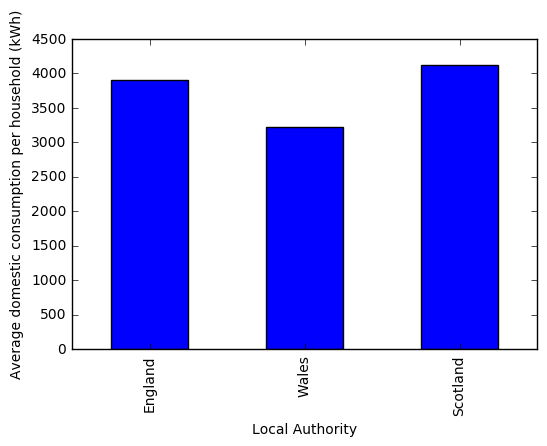

In [22]:
ax = cons_by_country['Average domestic consumption per household (kWh)'].plot.bar()
ax.set_ylabel('Average domestic consumption per household (kWh)')

In [23]:
cons_by_country.iloc[0,3]=3834
cons_by_country

C:\Users\Ossama\Anaconda3-4.2.0\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Ossama\Anaconda3-4.2.0\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Region,LA Code,LAU1,Domestic consumers - Economy 7 meters,Domestic consumers - Standard Meters,Domestic consumers - Total,Non-domestic consumers,Total number of Meters,Consumption (GWh) of Domestic consumers - Economy 7 meters,Consumption (GWh) of Domestic consumers - Standard Meters,...,Average (kWh) Domestic Economy 7 Median consumption,Average (kWh) Standard Mean consumption,Average (kWh) Standard Median consumption,Average (kWh) All Domestic Mean consumption,Average (kWh) All Domestic Median consumption,Average (kWh) Non-domestic Mean consumption,Average (kWh) Non-domestic Median consumption,Average (kWh) All Mean consumption,Average (kWh) All Median consumption,Average domestic consumption per household (kWh)
Local Authority,,,,,,,,,,,,,,,,,,,,,
England,NaN,E92000001,NaN,3834,19999,23833,2113,25946,19931,70925,...,3991,3546,2927,3812,3047,66981,8038,8957,3125,3911
Wales,NaN,W92000004,UKL,99,1310,1409,129,1538,625,4395,...,4957,3355,2870,3562,2937,75828,7344,9608,3017,3223
Scotland,NaN,S92000003,UKM,433,2348,2781,220,3001,2164,7944,...,3819,3383,2848,3635,2923,61337,8597,7861,3003,4122


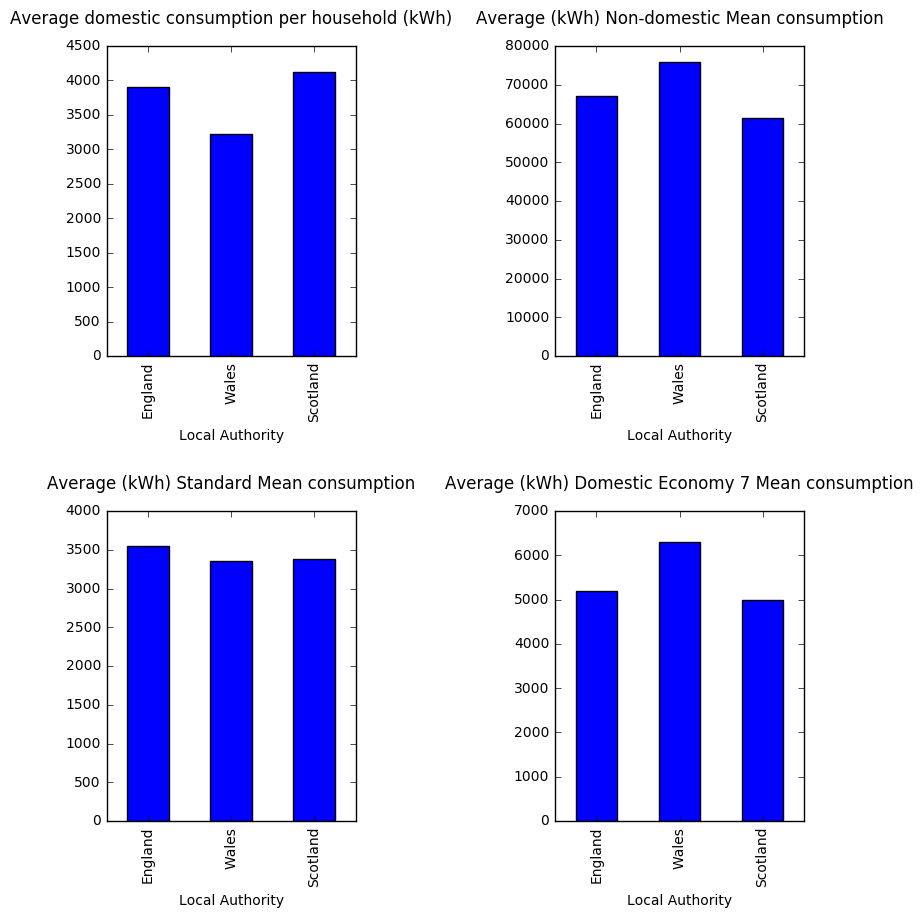

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 10))
ax1, ax2, ax3, ax4 = axes.flatten()
fig.subplots_adjust(hspace=.5, wspace=.8)

average_cons_household = cons_by_country['Average domestic consumption per household (kWh)'].copy().rename('')
average_cons_household.plot.bar(
    ax = ax1,
    title ='Average domestic consumption per household (kWh)'
)
ax1.title.set_position([.5, 1.05])

average_cons_non_domestic = cons_by_country['Average (kWh) Non-domestic Mean consumption'].copy().rename('')
average_cons_non_domestic.plot.bar(
    ax = ax2,
    title ='Average (kWh) Non-domestic Mean consumption'
)
ax2.title.set_position([.5, 1.05])

average_cons_standard_domestic = cons_by_country['Average (kWh) Standard Mean consumption'].copy().rename('')
average_cons_standard_domestic.plot.bar(
    ax = ax3,
    title ='Average (kWh) Standard Mean consumption'
)
ax3.title.set_position([.5, 1.05])

average_cons_economy7_domestic = cons_by_country['Average (kWh) Domestic Economy 7 Mean consumption'].copy().rename('')
average_cons_economy7_domestic.plot.bar(
    ax = ax4,
    title ='Average (kWh) Domestic Economy 7 Mean consumption'
)
ax4.title.set_position([.5, 1.05])

In [25]:
cons_england = elec_consumption.iloc[382:392,:]
cons_england.set_index('Local Authority',drop=True, inplace=True)
cons_england.loc[:,numeric_cols] = cons_england.loc[:,numeric_cols].replace(',','', regex=True).astype(float)
cons_england

C:\Users\Ossama\Anaconda3-4.2.0\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Ossama\Anaconda3-4.2.0\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Region,LA Code,LAU1,Domestic consumers - Economy 7 meters,Domestic consumers - Standard Meters,Domestic consumers - Total,Non-domestic consumers,Total number of Meters,Consumption (GWh) of Domestic consumers - Economy 7 meters,Consumption (GWh) of Domestic consumers - Standard Meters,...,Average (kWh) Domestic Economy 7 Median consumption,Average (kWh) Standard Mean consumption,Average (kWh) Standard Median consumption,Average (kWh) All Domestic Mean consumption,Average (kWh) All Domestic Median consumption,Average (kWh) Non-domestic Mean consumption,Average (kWh) Non-domestic Median consumption,Average (kWh) All Mean consumption,Average (kWh) All Median consumption,Average domestic consumption per household (kWh)
Local Authority,,,,,,,,,,,,,,,,,,,,,
North East,NaN,E12000001,UKC,69,1151,1220,84,1304,344,3616,...,3816,3142,2713,3247,2741,84737,7787,8494,2801,4005
North West,NaN,E12000002,UKD,234,2974,3208,246,3454,1343,10220,...,4607,3436,2941,3604,3005,76400,9072,8791,3083,3557
Yorkshire and The Humber,NaN,E12000003,UKE,173,2214,2387,186,2573,935,7443,...,4173,3362,2825,3510,2875,75012,8792,8682,2953,3588
East Midlands,NaN,E12000004,UKF,687,1359,2046,166,2212,3039,4654,...,3401,3426,2874,3761,3032,76604,9768,9220,3116,3853
West Midlands,NaN,E12000005,UKG,395,2039,2435,202,2637,2015,7303,...,3915,3581,3022,3827,3125,70969,8778,8969,3205,3926
East,NaN,E12000006,UKH,767,1865,2632,226,2858,3962,6973,...,3913,3739,3065,4155,3261,66375,8944,9074,3345,4193
Inner London,NaN,E13000001,NaN,139,1364,1504,237,1741,722,4426,...,4106,3244,2416,3424,2503,67627,5794,12172,2597,2888
Outer London,NaN,E13000002,NaN,317,1716,2033,168,2200,1535,6236,...,3842,3634,2969,3823,3070,54806,7097,7706,3129,4478
South East,NaN,E12000008,UKJ,684,3164,3848,341,4188,3680,12185,...,4196,3851,3111,4123,3250,62820,8020,8899,3326,4002


In [26]:
cons_england.drop(['Region'],axis=1,inplace=True)

C:\Users\Ossama\Anaconda3-4.2.0\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [27]:
cons_england

,LA Code,LAU1,Domestic consumers - Economy 7 meters,Domestic consumers - Standard Meters,Domestic consumers - Total,Non-domestic consumers,Total number of Meters,Consumption (GWh) of Domestic consumers - Economy 7 meters,Consumption (GWh) of Domestic consumers - Standard Meters,Consumption (GWh) of Domestic consumers - Total,...,Average (kWh) Domestic Economy 7 Median consumption,Average (kWh) Standard Mean consumption,Average (kWh) Standard Median consumption,Average (kWh) All Domestic Mean consumption,Average (kWh) All Domestic Median consumption,Average (kWh) Non-domestic Mean consumption,Average (kWh) Non-domestic Median consumption,Average (kWh) All Mean consumption,Average (kWh) All Median consumption,Average domestic consumption per household (kWh)
Local Authority,,,,,,,,,,,,,,,,,,,,,
North East,E12000001,UKC,69,1151,1220,84,1304,344,3616,3961,...,3816,3142,2713,3247,2741,84737,7787,8494,2801,4005
North West,E12000002,UKD,234,2974,3208,246,3454,1343,10220,11563,...,4607,3436,2941,3604,3005,76400,9072,8791,3083,3557
Yorkshire and The Humber,E12000003,UKE,173,2214,2387,186,2573,935,7443,8378,...,4173,3362,2825,3510,2875,75012,8792,8682,2953,3588
East Midlands,E12000004,UKF,687,1359,2046,166,2212,3039,4654,7693,...,3401,3426,2874,3761,3032,76604,9768,9220,3116,3853
West Midlands,E12000005,UKG,395,2039,2435,202,2637,2015,7303,9318,...,3915,3581,3022,3827,3125,70969,8778,8969,3205,3926
East,E12000006,UKH,767,1865,2632,226,2858,3962,6973,10935,...,3913,3739,3065,4155,3261,66375,8944,9074,3345,4193
Inner London,E13000001,NaN,139,1364,1504,237,1741,722,4426,5148,...,4106,3244,2416,3424,2503,67627,5794,12172,2597,2888
Outer London,E13000002,NaN,317,1716,2033,168,2200,1535,6236,7771,...,3842,3634,2969,3823,3070,54806,7097,7706,3129,4478
South East,E12000008,UKJ,684,3164,3848,341,4188,3680,12185,15865,...,4196,3851,3111,4123,3250,62820,8020,8899,3326,4002


In [28]:
cons_england.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, North East to South West
Data columns (total 23 columns):
LA Code                                                       10 non-null object
LAU1                                                          8 non-null object
Domestic consumers - Economy 7 meters                         10 non-null object
Domestic consumers - Standard Meters                          10 non-null object
Domestic consumers - Total                                    10 non-null object
Non-domestic consumers                                        10 non-null object
Total number of Meters                                        10 non-null object
Consumption (GWh) of Domestic consumers - Economy 7 meters    10 non-null object
Consumption (GWh) of Domestic consumers - Standard Meters     10 non-null object
Consumption (GWh) of Domestic consumers - Total               10 non-null object
Consumption (GWh) of Non-domestic consumers                   10 non-null ob

In [29]:
cons_england.dtypes

LA Code                                                       object
LAU1                                                          object
Domestic consumers - Economy 7 meters                         object
Domestic consumers - Standard Meters                          object
Domestic consumers - Total                                    object
Non-domestic consumers                                        object
Total number of Meters                                        object
Consumption (GWh) of Domestic consumers - Economy 7 meters    object
Consumption (GWh) of Domestic consumers - Standard Meters     object
Consumption (GWh) of Domestic consumers - Total               object
Consumption (GWh) of Non-domestic consumers                   object
Total consumption (GWh) of all consumers                      object
Average (kWh) Domestic Economy 7 Mean consumption             object
Average (kWh) Domestic Economy 7 Median consumption           object
Average (kWh) Standard Mean consum

In [30]:
cons_england[numeric_cols] = cons_england[numeric_cols].apply(pd.to_numeric)

C:\Users\Ossama\Anaconda3-4.2.0\lib\site-packages\pandas\core\frame.py:2378: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [34]:
cons_england['Domestic consumers - Economy 7 meters']=cons_england['Domestic consumers - Economy 7 meters'].astype('float64')

C:\Users\Ossama\Anaconda3-4.2.0\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [35]:
cons_england.dtypes

LA Code                                                        object
LAU1                                                           object
Domestic consumers - Economy 7 meters                         float64
Domestic consumers - Standard Meters                          float64
Domestic consumers - Total                                    float64
Non-domestic consumers                                        float64
Total number of Meters                                        float64
Consumption (GWh) of Domestic consumers - Economy 7 meters    float64
Consumption (GWh) of Domestic consumers - Standard Meters     float64
Consumption (GWh) of Domestic consumers - Total               float64
Consumption (GWh) of Non-domestic consumers                   float64
Total consumption (GWh) of all consumers                      float64
Average (kWh) Domestic Economy 7 Mean consumption             float64
Average (kWh) Domestic Economy 7 Median consumption           float64
Average (kWh) Standa

In [37]:
cons_england['Percentage of Economy 7 meters'] = cons_england['Domestic consumers - Economy 7 meters'] / \
                                                    cons_england['Domestic consumers - Total'] *100

C:\Users\Ossama\Anaconda3-4.2.0\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [38]:
cons_england

,LA Code,LAU1,Domestic consumers - Economy 7 meters,Domestic consumers - Standard Meters,Domestic consumers - Total,Non-domestic consumers,Total number of Meters,Consumption (GWh) of Domestic consumers - Economy 7 meters,Consumption (GWh) of Domestic consumers - Standard Meters,Consumption (GWh) of Domestic consumers - Total,...,Average (kWh) Standard Mean consumption,Average (kWh) Standard Median consumption,Average (kWh) All Domestic Mean consumption,Average (kWh) All Domestic Median consumption,Average (kWh) Non-domestic Mean consumption,Average (kWh) Non-domestic Median consumption,Average (kWh) All Mean consumption,Average (kWh) All Median consumption,Average domestic consumption per household (kWh),Percentage of Economy 7 meters
Local Authority,,,,,,,,,,,,,,,,,,,,,
North East,E12000001,UKC,69.0,1151.0,1220.0,84.0,1304.0,344.0,3616.0,3961.0,...,3142.0,2713.0,3247.0,2741.0,84737.0,7787.0,8494.0,2801.0,4005.0,5.655738
North West,E12000002,UKD,234.0,2974.0,3208.0,246.0,3454.0,1343.0,10220.0,11563.0,...,3436.0,2941.0,3604.0,3005.0,76400.0,9072.0,8791.0,3083.0,3557.0,7.294264
Yorkshire and The Humber,E12000003,UKE,173.0,2214.0,2387.0,186.0,2573.0,935.0,7443.0,8378.0,...,3362.0,2825.0,3510.0,2875.0,75012.0,8792.0,8682.0,2953.0,3588.0,7.247591
East Midlands,E12000004,UKF,687.0,1359.0,2046.0,166.0,2212.0,3039.0,4654.0,7693.0,...,3426.0,2874.0,3761.0,3032.0,76604.0,9768.0,9220.0,3116.0,3853.0,33.577713
West Midlands,E12000005,UKG,395.0,2039.0,2435.0,202.0,2637.0,2015.0,7303.0,9318.0,...,3581.0,3022.0,3827.0,3125.0,70969.0,8778.0,8969.0,3205.0,3926.0,16.221766
East,E12000006,UKH,767.0,1865.0,2632.0,226.0,2858.0,3962.0,6973.0,10935.0,...,3739.0,3065.0,4155.0,3261.0,66375.0,8944.0,9074.0,3345.0,4193.0,29.141337
Inner London,E13000001,NaN,139.0,1364.0,1504.0,237.0,1741.0,722.0,4426.0,5148.0,...,3244.0,2416.0,3424.0,2503.0,67627.0,5794.0,12172.0,2597.0,2888.0,9.242021
Outer London,E13000002,NaN,317.0,1716.0,2033.0,168.0,2200.0,1535.0,6236.0,7771.0,...,3634.0,2969.0,3823.0,3070.0,54806.0,7097.0,7706.0,3129.0,4478.0,15.592720
South East,E12000008,UKJ,684.0,3164.0,3848.0,341.0,4188.0,3680.0,12185.0,15865.0,...,3851.0,3111.0,4123.0,3250.0,62820.0,8020.0,8899.0,3326.0,4002.0,17.775468


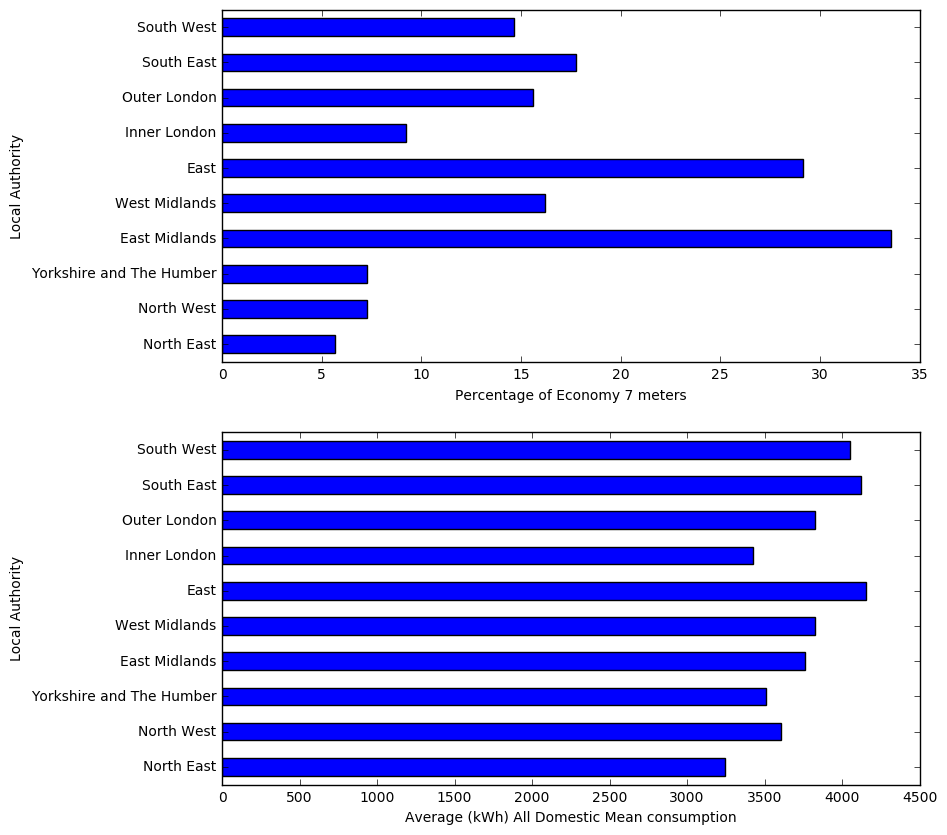

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 10))
ax1, ax2 = axes.flatten()
cons_england['Percentage of Economy 7 meters'].plot.barh(ax = ax1)
ax1.set_xlabel('Percentage of Economy 7 meters')

cons_england['Average (kWh) All Domestic Mean consumption'].plot.barh(ax = ax2)
ax2.set_xlabel('Average (kWh) All Domestic Mean consumption')
